In [2]:
import sys
sys.path.append("../src")

from event_selections import *
import matplotlib.pyplot as plt

In [3]:
sys.path.append("../src")
c_folder="../../data/calibration"
d_folder="../../data/runData"
r_n=305
p_folder="../../plots/run_"+str(r_n)

In [4]:
%%time
clean_run=import_and_select(c_folder,d_folder,r_n)

Number of events: 47351


Initial pedestal-based selection performed.
Events left: 45849


Events with multiple hits in first layer removed.
Events left: 39395


Events with hits in the back 7 layers removed.
Events left: 38466


CPU times: user 21.1 s, sys: 4.36 s, total: 25.4 s
Wall time: 25.5 s


In [5]:
layer_energy=clean_run.groupby(["layer"]).sum().drop(columns=["event", "strip"]).reset_index()
strip_energy=clean_run.groupby(["layer", "strip"]).sum().drop(columns=["event"]).reset_index()
event_n=len(clean_run.event.unique())

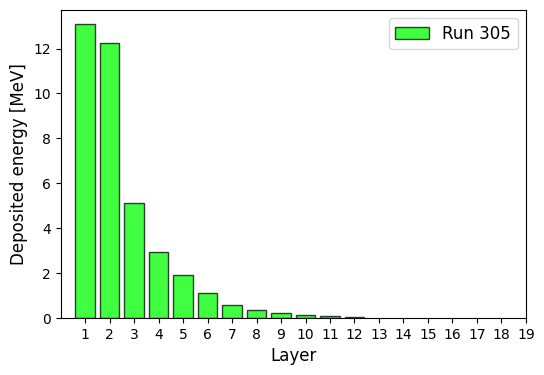

In [35]:
plt.rcParams["figure.figsize"]=(6,4)
plt.bar(layer_energy['layer'], (layer_energy["adc_sum_end0"]+layer_energy["adc_sum_end1"])/(2*event_n), 
        color='lime', alpha=0.75, edgecolor="black", label="Run "+str(r_n))
plt.xticks(np.arange(1,20))
plt.xlabel("Layer", fontsize=12)
plt.ylabel("Deposited energy [MeV]", fontsize=12)
plt.legend(fontsize=12)
#plt.title("Longitudinal shower profile", fontsize=15)
plt.savefig(p_folder+"/longitudinal.png", bbox_inches='tight')
plt.show()

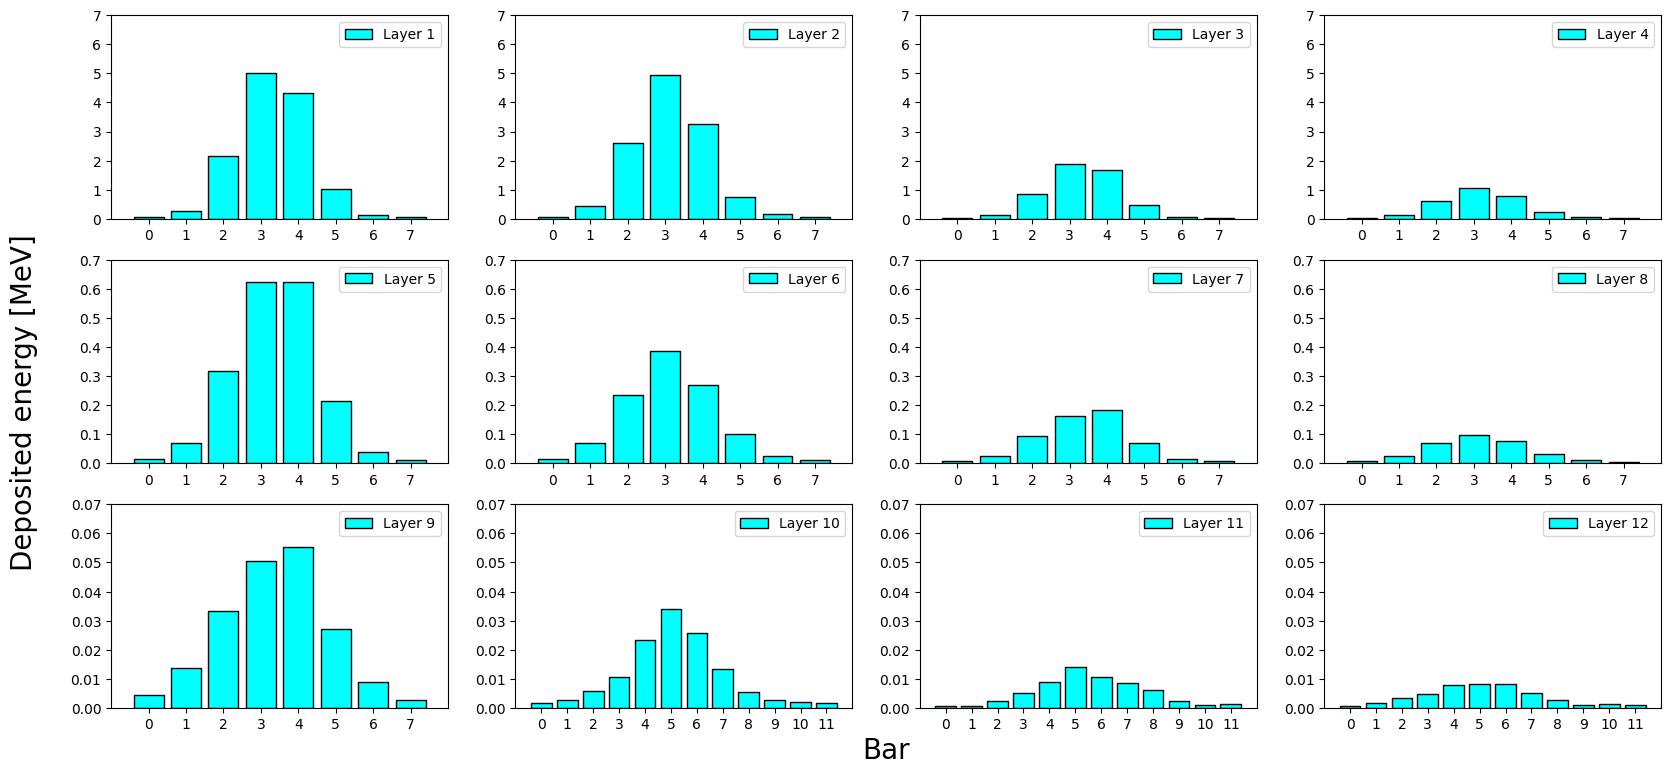

In [38]:
plt.rcParams["figure.figsize"]=(20,9)
for i in range(1,13):
    layered=strip_energy[strip_energy['layer']==i]
    
    plt.subplot(3,4,i)
    plt.bar(layered["strip"],(layered["adc_sum_end0"]+layered["adc_sum_end1"])/(2*event_n),
            color='cyan' , edgecolor='black', label="Layer "+str(i))
    plt.legend()
    if i<10:
        plt.xlim(-1,8)
        plt.xticks(np.arange(0,8))
    else:
        plt.xlim(-1,12)
        plt.xticks(np.arange(0,12))
    if i<5:
        plt.ylim(0,7)
    elif i<9:
        plt.ylim(0,0.7)
    else:
        plt.ylim(0,0.07)

plt.text(-1.3,-0.25, 'Bar', ha='center',transform=plt.gca().transAxes, fontsize=20)
plt.text(-3.9,1.5, 'Deposited energy [MeV]', va='center', transform=plt.gca().transAxes, rotation='vertical', fontsize=20)
#plt.suptitle("Transverse beam profiles (Run "+str(r_n)+")", y=0.95, fontsize=25)
plt.savefig(p_folder+"/transverse.png", bbox_inches='tight')
plt.show()

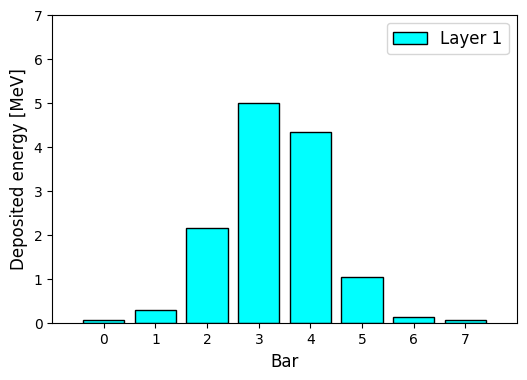

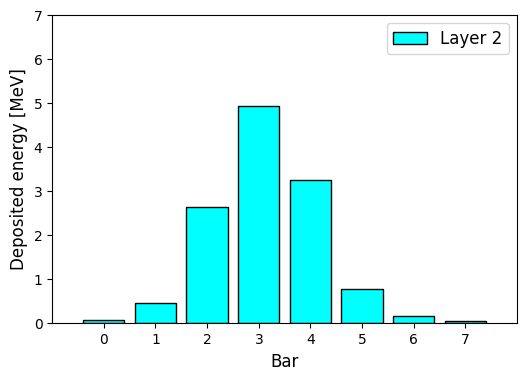

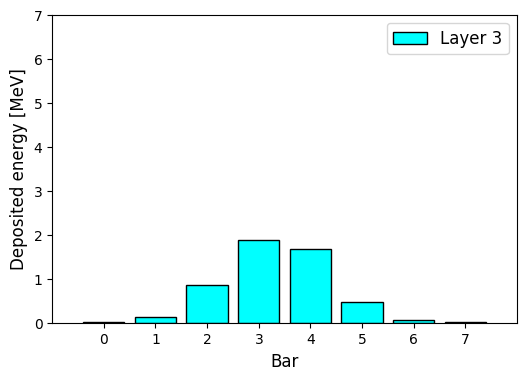

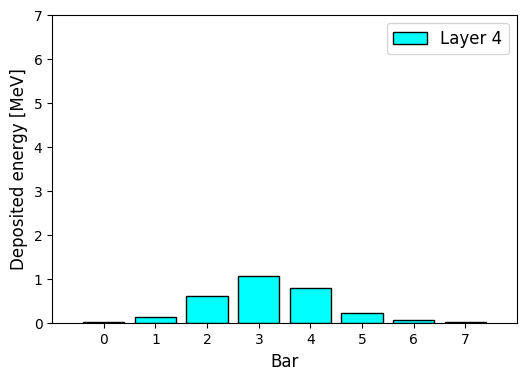

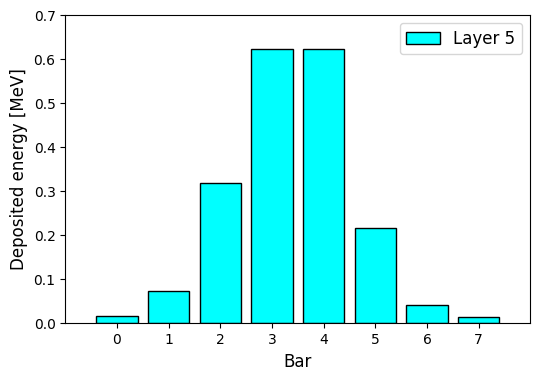

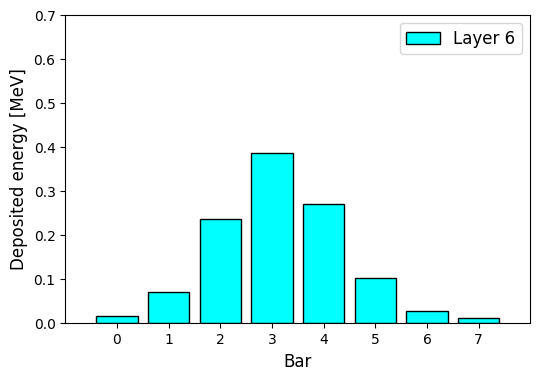

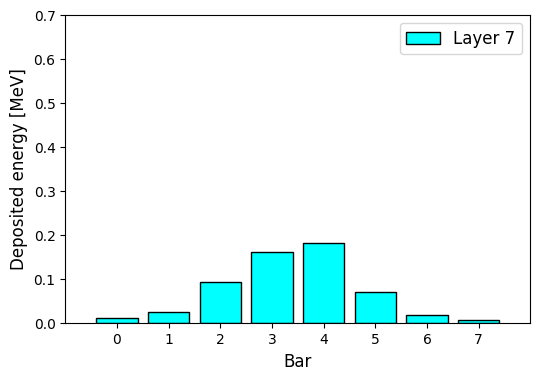

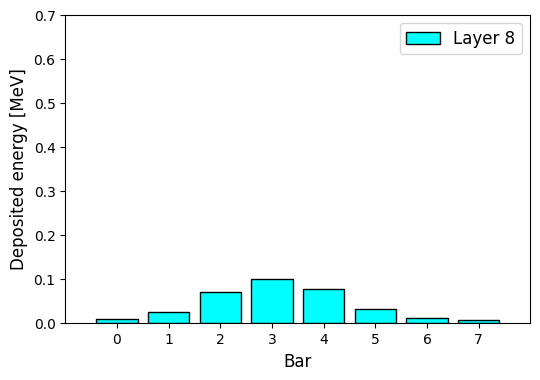

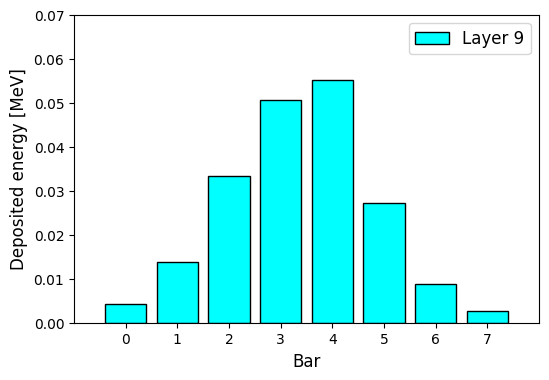

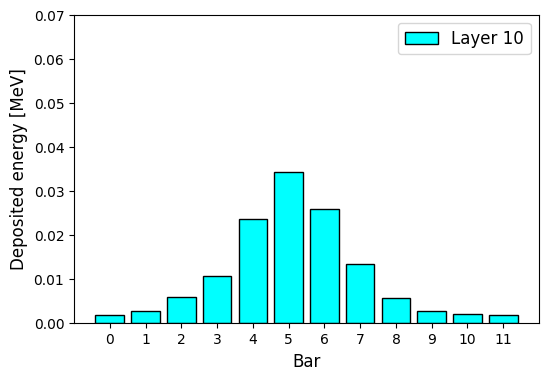

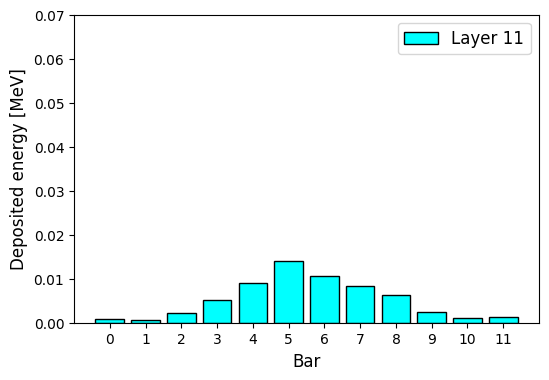

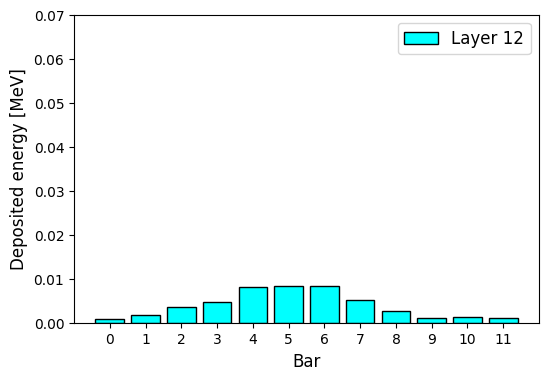

In [41]:
plt.rcParams["figure.figsize"]=(6,4)
for i in range(1,13):
    layered=strip_energy[strip_energy['layer']==i]

    plt.bar(layered["strip"],(layered["adc_sum_end0"]+layered["adc_sum_end1"])/(2*event_n),
            color='cyan' , edgecolor='black', label="Layer "+str(i))
    plt.legend(fontsize=12)
    if i<10:
        plt.xlim(-1,8)
        plt.xticks(np.arange(0,8))
    else:
        plt.xlim(-1,12)
        plt.xticks(np.arange(0,12))
    if i<5:
        plt.ylim(0,7)
    elif i<9:
        plt.ylim(0,0.7)
    else:
        plt.ylim(0,0.07)
    plt.ylabel("Deposited energy [MeV]", fontsize=12)
    plt.xlabel("Bar", fontsize=12)
    plt.savefig(p_folder+"/transverse_layer_"+str(i)+".png", bbox_inches='tight')
    plt.show()